<font size=7> Latencies Analysis

# Vector Plot

Here we try we take a set of pairs of neurla units and we create "vector plot" from them. A vector points in the direction from 1 neural unit to the other, except it has a fixed length.

In [1]:
from human_hip import latencies
import pickle

In [2]:
# load arrows data
file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/arrows/pairs/deltas_20ms_cuttoff_2_15ms.pkl', 'rb')
arrows = pickle.load(file)
file.close()

# load original spikedata Spike Data
# file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', 'rb')
# sd = pickle.load(file)
# file.close()

In [13]:
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrow
from sklearn import preprocessing
import numpy as np

In [14]:

# The function creates  plot of arrows show the direction that information is flowing out of neurons
def vector_plot( pairs, lags, neuron_xy, normalize=True, arrow_length=75):
    """
    Inputs:
        pairs: np.array of neuron indices (as pairs) for which a connection exists, ex: [[0,1], [0,2], [2,3]]
        lags: np.array of the average lag time in ms corresponding to the neuron pairs, ex: [1, 3, -4]
        neuron_xy: np.array of the x/y locations of the neurons, ex: [ [0,23.5], [13,35], [56,24] ]
        arrow_length: integer of how long the arrows should be drawn on the final plot
    Outputs:
        A plot depicting th 2D locations of neurons, with arrows showing the direction of information flow
    """
    # Plot original scatter
    plt.figure(figsize=(8, 8))
    plt.scatter( neuron_xy[:,0], neuron_xy[:,1], alpha=0.15, c='grey')

    # make pairs point in same direction
    pairs = pairs                         # make a copy of pairs and lags, this avoids some bug
    lags = lags
    for i in range(len(pairs)):
        if lags[i]<0:
            pairs[i] = [ pairs[i][1], pairs[i][0] ]

    # Creat arrows show angle of information flow from a neuron
    starts = neuron_xy[ pairs[:,0] ]  # Get the x/y locations of the start and end neurons of each pair
    ends = neuron_xy[ pairs[:,1] ]
    centered = ends-starts   # Get the directions of arrows, then make of of them the same length
    normalized = preprocessing.normalize(centered) * arrow_length if normalize else centered # make same lengths, unless told otherwise
    
    # Draw Arrows
    arrow_color = "red"
    for i in range(len(starts)):
        arrow = FancyArrow( 
                starts[i][0], starts[i][1], normalized[i][0], normalized[i][1], length_includes_head=True, head_width=25,
                linewidth=1, color=arrow_color, alpha=0.7, edgecolor=arrow_color, facecolor=arrow_color )
        plt.gca().add_patch(arrow)


In [11]:
import matplotlib.pyplot as plt

In [7]:
pairs = arrows["pairs"]
lags = arrows["lags"]
neuron_xy = arrows["neuron_xy"] 

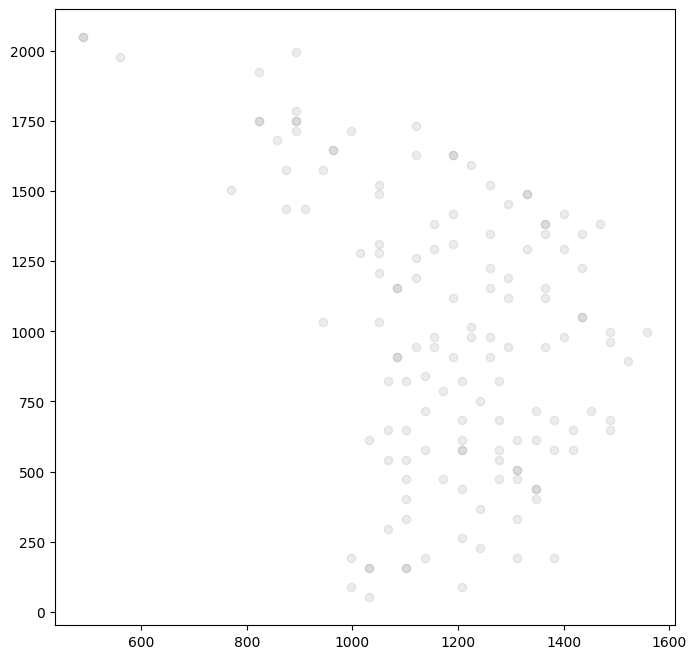

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter( neuron_xy[:,0], neuron_xy[:,1], alpha=0.15, c='grey')

# make pairs point in same direction
pairs = pairs                         # make a copy of pairs and lags, this avoids some bug
lags = lags
for i in range(len(pairs)):
    if lags[i]<0:
        pairs[i] = [ pairs[i][1], pairs[i][0] ]


In [ ]:

# Creat arrows show angle of information flow from a neuron
starts = neuron_xy[ pairs[:,0] ]  # Get the x/y locations of the start and end neurons of each pair
ends = neuron_xy[ pairs[:,1] ]
centered = ends-starts   # Get the directions of arrows, then make of of them the same length
normalized = preprocessing.normalize(centered) * arrow_length if normalize else ends # make same lengths, unless told otherwise


In [ ]:
# Draw Arrows
arrow_color = "red"
for i in range(len(starts)):
    arrow = FancyArrow( 
            starts[i][0], starts[i][1], normalized[i][0], normalized[i][1], length_includes_head=True, head_width=25,
            linewidth=1, color=arrow_color, alpha=0.7, edgecolor=arrow_color, facecolor=arrow_color )
    plt.gca().add_patch(arrow)

/workspaces/human_hippocampus/src/human_hip/latencies/vectors.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrow(


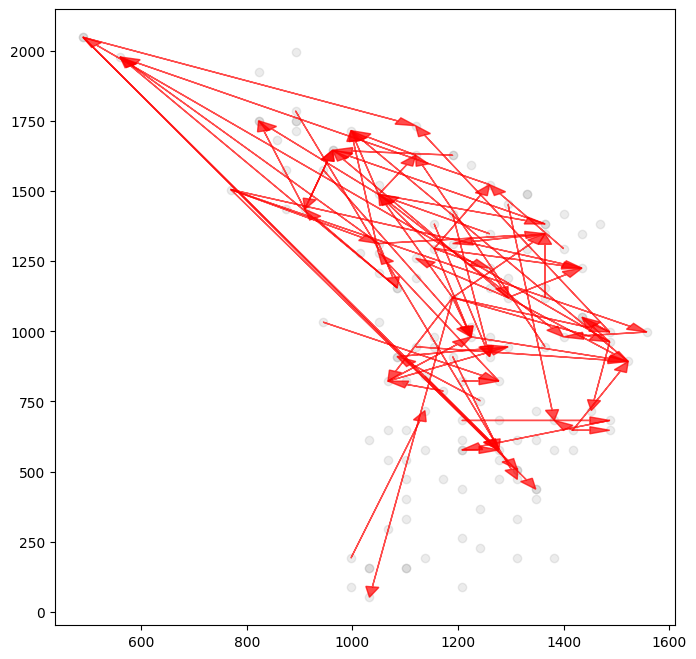

In [4]:
latencies.vector_plot( arrows["pairs"], arrows["lags"], arrows["neuron_xy"], normalize=False )

/workspaces/human_hippocampus/src/human_hip/latencies/vectors.py:39: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrow(


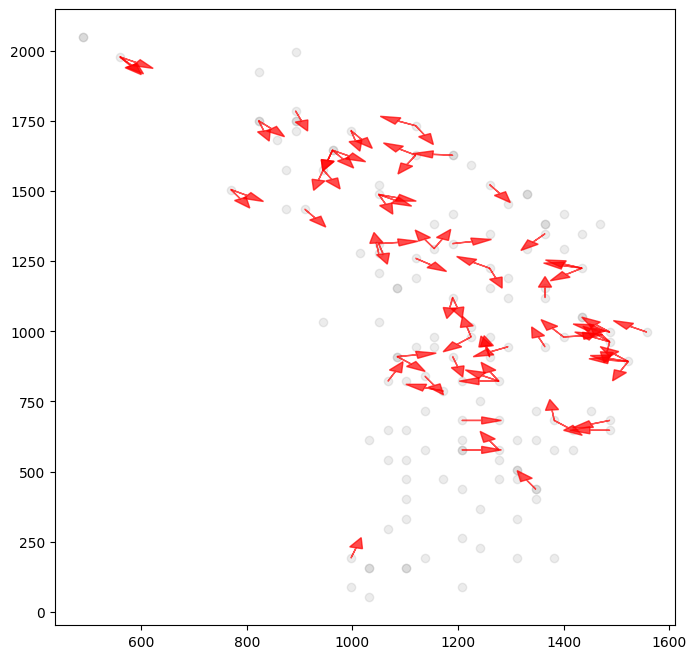

In [15]:
latencies.vector_plot( arrows["pairs"], arrows["lags"], arrows["neuron_xy"] )

/workspaces/human_hippocampus/src/human_hip/latencies/vectors.py:39: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrow(


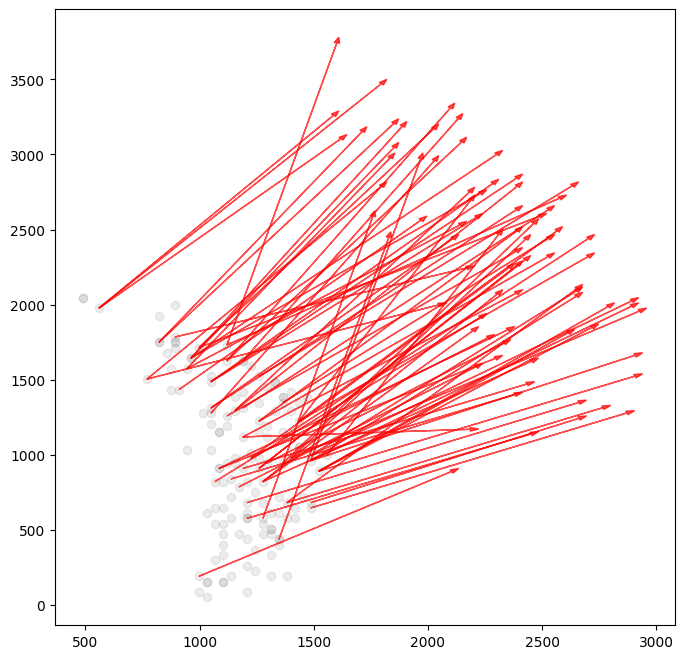

In [4]:
latencies.vector_plot( arrows["pairs"], arrows["lags"], arrows["neuron_xy"], normalize=False )

/workspaces/human_hippocampus/src/human_hip/latencies/vectors.py:39: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrow(


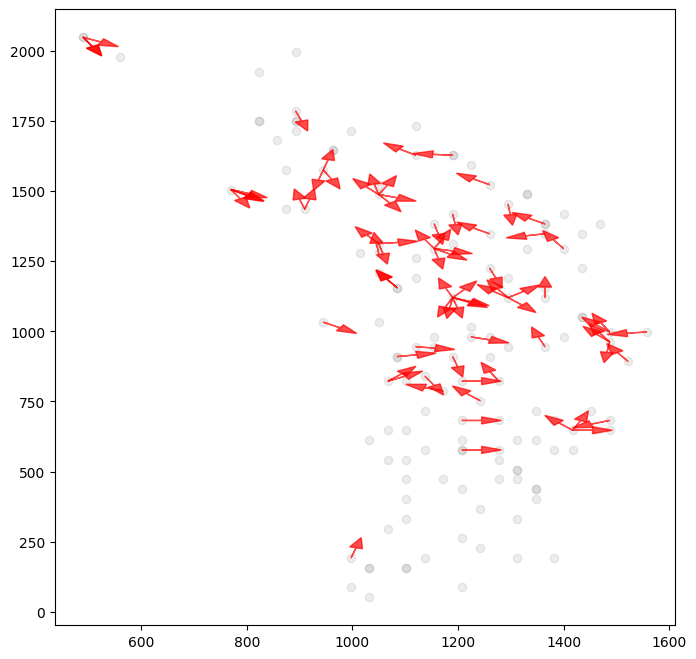

In [5]:
latencies.vector_plot( arrows["pairs"], arrows["lags"], arrows["neuron_xy"] )